In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

# Examine PCA Models

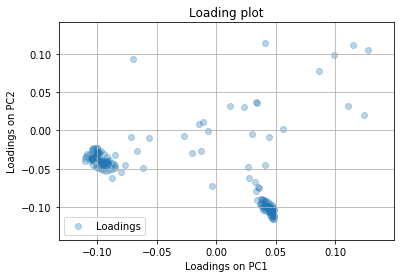

In [2]:
seed = 0
pickle_filename = "Training_Out/%s_pca_model.pkl" % seed
with open(pickle_filename, 'rb') as file:
    pca_model = pickle.load(file)
    
loadings = pca_model.components_
plt.scatter(*loadings, alpha=0.3, label="Loadings");

plt.title("Loading plot");
plt.xlabel("Loadings on PC1");
plt.ylabel("Loadings on PC2");
plt.grid();
plt.legend(loc='lower left');

In [3]:
df1=pd.DataFrame(loadings)

In [4]:
df2=pd.DataFrame(abs(loadings)<0.05).T
#df2

In [5]:
df2[0].value_counts(dropna=False)

True     94
False    90
Name: 0, dtype: int64

In [6]:
df2[1].value_counts(dropna=False)

True     92
False    92
Name: 1, dtype: int64

# Unstacking Training Patterns

In [7]:
for j in range(20):   
    seed=j
    goal_train_pca=np.load('Training_Out/%s_goal_train_pca.npy' % seed)
    goal_train_time=np.load('Training_Out/%s_goal_train_time.npy' % seed)

    goal_train_dict={}
    a=0
    for i in range(len(goal_train_time)):
        b=a+int(len(goal_train_time[i]))
        goal_train_dict[i]=goal_train_pca[a:b]
        a=b
    
    pickle_filename = "Unstacked_Training/%s_goal_train_dict.pkl" % seed
    with open(pickle_filename, 'wb') as file:
        pickle.dump(goal_train_dict, file)

In [8]:
for j in range(20):   
    seed=j
    noplay_train_pca=np.load('Training_Out/%s_noplay_train_pca.npy' % seed)
    noplay_train_time=np.load('Training_Out/%s_noplay_train_time.npy' % seed)

    noplay_train_dict={}
    a=0
    for i in range(len(noplay_train_time)):
        b=a+int(len(noplay_train_time[i]))
        noplay_train_dict[i]=noplay_train_pca[a:b]
        a=b
    
    pickle_filename = "Unstacked_Training/%s_noplay_train_dict.pkl" % seed
    with open(pickle_filename, 'wb') as file:
        pickle.dump(noplay_train_dict, file)

In [9]:
pickle_filename = "Unstacked_Training/0_goal_train_dict.pkl"
with open(pickle_filename, 'rb') as file:
    goal_train_dict = pickle.load(file)
    
len(goal_train_dict)

84